In [85]:
import numpy as np

import pandas as pd



# **Data Preprocessing**

In [86]:
Score=pd.read_csv('/content/Credit_score.csv') # loading the dataset into csv file

In [87]:
Score.shape

(57864, 28)

In [88]:
Score

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22.1,2,49.574949,80.41529543900253,4.0,312.494089,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,2,49.574949,118.28022162236736,3.0,284.629162,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22.3,2,49.574949,81.699521264648,2.0,331.209863,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22.4,2,49.574949,199.4580743910713,1.0,223.451310,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22.5,2,49.574949,41.420153086217326,5.0,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57859,0x1a06e,CUS_0x3e1a,May,Rothackery,27.0,939-10-6883,Accountant,29416.81,2742.400833,8,...,Standard,133.18,25.786420,NaN,0,37.723926,NaN,6.0,413.262679,2
57860,0x1a071,CUS_0x3e1a,August,Rothackery,27.0,939-10-6883,Accountant,29416.81,2742.400833,8,...,Standard,133.18,29.009775,NaN,2,37.723926,18.91940804864036,6.0,457.596749,2
57861,0x1a076,CUS_0x67e2,January,Emilyg,17.0,438-69-8340,Entrepreneur,30195.47,2764.289167,5,...,_,893.63,33.654053,NaN,1,0.000000,56.74489785735039,4.0,479.684019,2
57862,0x1a077,CUS_0x67e2,February,Emilyg,17.0,438-69-8340,Entrepreneur,30195.47,2619.189233,5,...,Standard,893.63,25.354973,NaN,0,145.099934,__10000__,6.0,482.634305,2


In [89]:
Score = Score.drop(Score[Score['Credit_Score'] == 2].index) # drop class 2 , I want to find 1 and 3, bad or good

In [90]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
Score['Credit_Score']= encode.fit_transform(Score['Credit_Score']) # now it's 0 and 1  : 0 for bad score  and 1 for good score
Score['Type_of_Loan']= encode.fit_transform(Score['Type_of_Loan'])

### **Exploring the data**

In [91]:
Score.isnull().sum() #finding the number of missing values in each feature

ID                             0
Customer_ID                    0
Month                          0
Name                        2764
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       4115
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      1839
Changed_Credit_Limit           0
Num_Credit_Inquiries         498
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2438
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1222
Payment_Behaviour              0
Monthly_Balance              357
Credit_Score                   0
dtype: int64

In [92]:
Score.info() # gaining some information about the data in the dataset, such as data types, and the sum of non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27215 entries, 0 to 57854
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        27215 non-null  object 
 1   Customer_ID               27215 non-null  object 
 2   Month                     27215 non-null  object 
 3   Name                      24451 non-null  object 
 4   Age                       27215 non-null  float64
 5   SSN                       27215 non-null  object 
 6   Occupation                27215 non-null  object 
 7   Annual_Income             27215 non-null  float64
 8   Monthly_Inhand_Salary     23100 non-null  float64
 9   Num_Bank_Accounts         27215 non-null  int64  
 10  Num_Credit_Card           27215 non-null  int64  
 11  Interest_Rate             27215 non-null  int64  
 12  Num_of_Loan               27215 non-null  object 
 13  Type_of_Loan              27215 non-null  int64  
 14  Delay_

### **Visualaization**

**Ploting the dependent variable: Credit_Score**

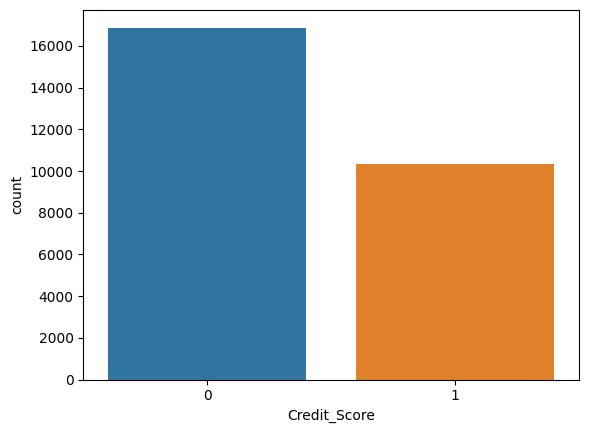

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Credit_Score", data=Score)
plt.show()

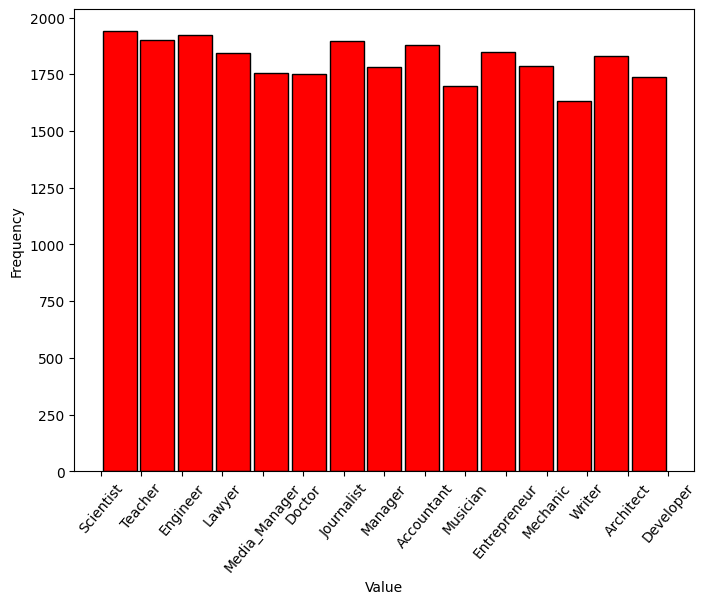

In [94]:
plt.figure(figsize=(8, 6))
plt.hist(Score['Occupation'], bins=15, rwidth=0.9, color='red', edgecolor='black')
plt.xticks(rotation=50)
# Add labels to the x and y axes
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

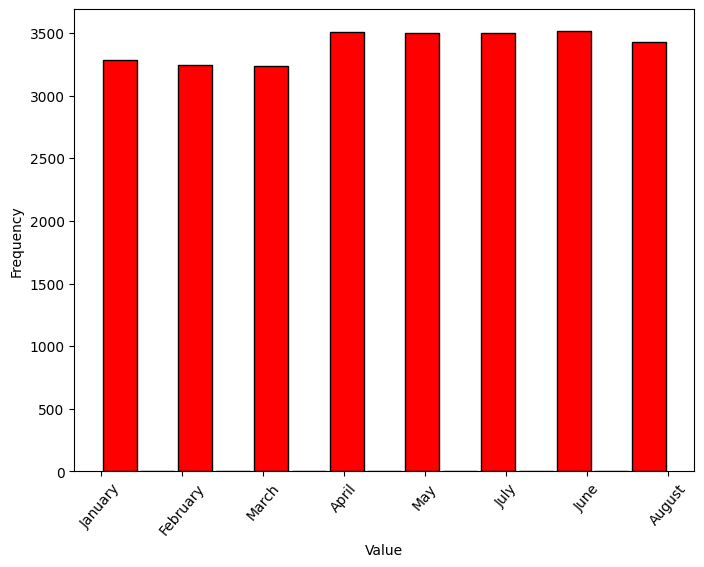

In [95]:
plt.figure(figsize=(8, 6))
plt.hist(Score['Month'], bins=15, rwidth=0.9, color='red', edgecolor='black')
plt.xticks(rotation=50)
# Add labels to the x and y axes
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In [96]:
Score['Month']= encode.fit_transform(Score['Month'])

### **Dealing with features and missing values**

**Null values**

In [97]:
Score['Monthly_Inhand_Salary'].fillna(Score['Monthly_Inhand_Salary'].mean(), inplace = True) #float
Score['Type_of_Loan'].fillna(Score['Type_of_Loan'].mode()[0], inplace = True) # object
Score['Num_of_Delayed_Payment'].fillna(Score['Num_of_Delayed_Payment'].mean(), inplace = True) #float
Score['Num_Credit_Inquiries'].fillna(Score['Num_Credit_Inquiries'].mean(), inplace = True)#float
Score['Credit_History_Age'].fillna(Score['Credit_History_Age'].mean(), inplace = True)#float
Score['Amount_invested_monthly'].fillna(Score['Amount_invested_monthly'].mode()[0], inplace = True)# object
Score['Monthly_Balance'].fillna(Score['Monthly_Balance'].mean(), inplace = True)#float

In [98]:
Score.isnull().sum() # checking the null values again

ID                             0
Customer_ID                    0
Month                          0
Name                        2764
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

<ipython-input-99-de4bf41ec8d7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Score.corr()


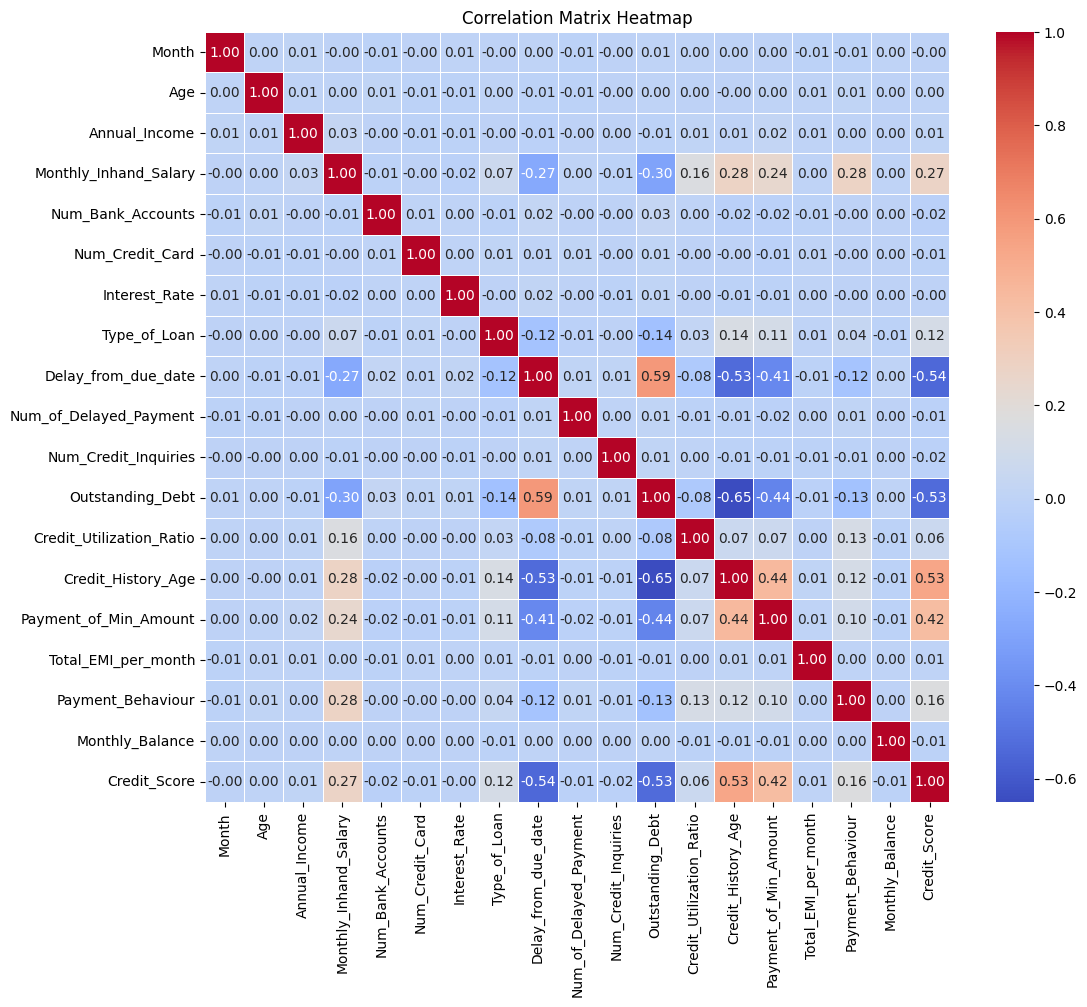

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = Score.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [100]:
Score

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22.100000,2,49.574949,80.41529543900253,4.0,312.494089,1
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4163.358984,3,...,Good,809.98,31.944960,17.813457,2,49.574949,118.28022162236736,3.0,284.629162,1
2,0x1604,CUS_0xd40,6,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,4163.358984,3,...,Good,809.98,28.609352,22.300000,2,49.574949,81.699521264648,2.0,331.209863,1
3,0x1605,CUS_0xd40,0,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4163.358984,3,...,Good,809.98,31.377862,22.400000,2,49.574949,199.4580743910713,1.0,223.451310,1
4,0x1606,CUS_0xd40,7,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22.500000,2,49.574949,41.420153086217326,5.0,341.489231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57850,0x1a059,CUS_0x981d,1,Shirouzuj,35.0,569-61-4012,Developer,20063.56,1832.963333,6,...,_,2633.67,39.246164,19.300000,1,95.002611,85.05638486399404,4.0,263.237338,0
57851,0x1a05e,CUS_0x5d36,3,Andrean,38.0,372-03-0075,Scientist,29410.64,2712.886667,8,...,Bad,1830.01,39.928016,11.800000,1,110.942867,180.78567141339215,3.0,249.560129,0
57852,0x1a060,CUS_0x5d36,6,Andrean,38.0,372-03-0075,Scientist,29410.64,2712.886667,8,...,Bad,1830.01,29.075862,11.100000,1,110.942867,82.53795416745135,5.0,327.807846,0
57853,0x1a061,CUS_0x5d36,0,Andrean,38.0,372-03-0075,Scientist,29410.64,2712.886667,8,...,Bad,1830.01,34.696117,11.110000,1,110.942867,43.99519590683674,6.0,356.350604,0


In [101]:
#Dropping features that are not important or have low correlation with the dependent variable Credit_Score

# Not Important
Score.drop('ID', axis=1, inplace=True)
Score.drop('Customer_ID', axis=1, inplace=True)
Score.drop('Name', axis=1, inplace=True)
Score.drop('SSN', axis=1, inplace=True)
Score.drop('Num_of_Loan', axis=1, inplace=True)

# Low Correlation
Score.drop('Age', axis=1, inplace=True)
Score.drop('Interest_Rate', axis=1, inplace=True)
Score.drop('Credit_Mix', axis=1, inplace=True)
Score.drop('Changed_Credit_Limit', axis=1, inplace=True)

# had problems with:
Score.drop('Amount_invested_monthly', axis=1, inplace=True)

In [102]:
Score.head(3)

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,Scientist,19114.12,1824.843333,3,4,62,3.0,7.000000,4.0,809.98,26.822620,22.100000,2,49.574949,4.0,312.494089,1
1,2,Scientist,19114.12,4163.358984,3,4,62,-1.0,28.234001,4.0,809.98,31.944960,17.813457,2,49.574949,3.0,284.629162,1
2,6,Scientist,19114.12,4163.358984,3,4,62,3.0,7.000000,4.0,809.98,28.609352,22.300000,2,49.574949,2.0,331.209863,1


**Finding duplicated rows:**

In [103]:
duplicated_rows = Score.duplicated()
num_duplicates = duplicated_rows.sum()
num_duplicates

0

**Encoding categorical Data**

In [104]:
Score = pd.get_dummies(Score, prefix='Occupation', columns=['Occupation'], drop_first=False)
Score.head()

,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,3,19114.12,1824.843333,3,4,62,3.0,7.000000,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
1,2,19114.12,4163.358984,3,4,62,-1.0,28.234001,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
2,6,19114.12,4163.358984,3,4,62,3.0,7.000000,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
3,0,19114.12,4163.358984,3,4,62,5.0,4.000000,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
4,7,19114.12,1824.843333,3,4,62,6.0,28.234001,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0


In [105]:
Score.describe()

,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
count,27215.000000,2.721500e+04,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,...,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000,27215.000000
mean,3.500276,1.700169e+05,4163.358984,17.073268,23.150358,1894.746022,22.528753,28.234001,27.854026,1589.354883,...,0.067830,0.069704,0.067720,0.065515,0.065699,0.064560,0.062466,0.071247,0.069925,0.060040
std,2.303334,1.400561e+06,2996.772843,118.425433,131.133444,1061.665064,16.557304,201.005451,188.109165,1155.118348,...,0.251459,0.254653,0.251269,0.247438,0.247760,0.245752,0.242004,0.257242,0.255025,0.237566
min,0.000000,7.005930e+03,319.556250,-1.000000,0.000000,0.000000,-5.000000,-3.000000,0.000000,0.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.876910e+04,1719.660000,3.000000,4.000000,967.000000,10.000000,8.000000,3.000000,706.960000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.802986e+04,3741.147500,6.000000,6.000000,1890.000000,18.000000,14.000000,6.000000,1353.770000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,7.151892e+04,5217.252083,8.000000,7.000000,2868.000000,31.000000,20.000000,10.000000,2265.530000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,2.419806e+07,15204.633333,1794.000000,1499.000000,3398.000000,67.000000,4360.000000,2592.000000,4998.070000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Spliting the dataset to dependent(y) and independent(X) variables**

In [106]:
# Declaring feature vector and target variable
X = Score.drop(['Credit_Score'], axis=1)
y = Score['Credit_Score']

In [107]:
# Spliting the dataset to Training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [108]:
Score

,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,3,19114.12,1824.843333,3,4,62,3.0,7.000000,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
1,2,19114.12,4163.358984,3,4,62,-1.0,28.234001,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
2,6,19114.12,4163.358984,3,4,62,3.0,7.000000,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
3,0,19114.12,4163.358984,3,4,62,5.0,4.000000,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
4,7,19114.12,1824.843333,3,4,62,6.0,28.234001,4.0,809.98,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57850,1,20063.56,1832.963333,6,9,2898,13.0,21.000000,11.0,2633.67,...,0,0,0,0,0,0,0,0,0,0
57851,3,29410.64,2712.886667,8,10,588,61.0,21.000000,11.0,1830.01,...,0,0,0,0,0,0,0,1,0,0
57852,6,29410.64,2712.886667,8,10,588,52.0,21.000000,12.0,1830.01,...,0,0,0,0,0,0,0,1,0,0
57853,0,29410.64,2712.886667,8,10,588,57.0,21.000000,12.0,1830.01,...,0,0,0,0,0,0,0,1,0,0


**Feature Selection Select KBest**

In [109]:
from sklearn.feature_selection import SelectKBest, f_regression

In [110]:
# I will create an object that will hold the best number of features, I will set it to 8 features
best_features = SelectKBest(f_regression, k=19)

In [111]:
# now I will fit this object on the trining data to show the best 8 features
best_features.fit(X_train, y_train)

SelectKBest(k=19, score_func=<function f_regression at 0x7f336a7970a0>)

In [112]:
X_selected = best_features.transform(X)

In [113]:
# now I will transform the training and testing sets to only keep the selected features from 'best_features'
# using transform() method:

X_train_selected = best_features.transform(X_train)
X_test_selected = best_features.transform(X_test)

### **Train and Test ANN Model**

In [114]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

In [115]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim=X_train_selected.shape[1]))

In [116]:
# Update the input_dim parameter in the first Dense layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [117]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                     activation = 'sigmoid'))

In [118]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [119]:
classifier.fit(X_train_selected, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
2178/2178 [==============================] - 6s 2ms/step - loss: 0.4510 - accuracy: 0.7883
Epoch 2/20
2178/2178 [==============================] - 5s 2ms/step - loss: 0.4098 - accuracy: 0.8186
Epoch 3/20
2178/2178 [==============================] - 5s 3ms/step - loss: 0.3979 - accuracy: 0.8243
Epoch 4/20
2178/2178 [==============================] - 4s 2ms/step - loss: 0.3908 - accuracy: 0.8281
Epoch 5/20
2178/2178 [==============================] - 5s 2ms/step - loss: 0.3869 - accuracy: 0.8302
Epoch 6/20
2178/2178 [==============================] - 5s 2ms/step - loss: 0.3849 - accuracy: 0.8315
Epoch 7/20
2178/2178 [==============================] - 5s 2ms/step - loss: 0.3840 - accuracy: 0.8309
Epoch 8/20
2178/2178 [==============================] - 5s 2ms/step - loss: 0.3821 - accuracy: 0.8303
Epoch 9/20
2178/2178 [==============================] - 4s 2ms/step - loss: 0.3808 - accuracy: 0.8326
Epoch 10/20
2178/2178 [==============================] - 4s 2ms/step - loss: 0.379

In [120]:
y_pred = classifier.predict(X_test_selected)
y_pred = (y_pred > 0.5)

171/171 [==============================] - 0s 1ms/step


In [121]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

rec = recall_score(y_test,y_pred, average='macro')
pre =  precision_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')
acc = accuracy_score(y_test,y_pred)

print('Recall:', rec)
print('Precision:', pre)
print('F1-Score:', f1)
print('Accuracy:', acc)

Recall: 0.8424994534701767
Precision: 0.8246839921630329
F1-Score: 0.8285975604133562
Accuracy: 0.8337313981260335


In [122]:
#Importing all necessary libraries

# train_test_split function is a  function used to split a dataset into two subsets: a training set and a test set.
from sklearn.model_selection import train_test_split
#DecisionTreeClassifier is a class that implements the decision tree algorithm for classification problems. '
#it can handle both numerical and categorical data and it doesn't require data normalization.
from sklearn.tree import DecisionTreeClassifier
#KNeighborsClassifier used to create a k-Nearest Neighbors (k-NN) classifier model.
from sklearn.neighbors import KNeighborsClassifier
#GaussianNB used to create a Gaussian Naive Bayes (NB) classifier model.
from sklearn.naive_bayes import GaussianNB
#used to evaluate the performance of a classification model.
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.preprocessing import MinMaxScaler

In [123]:
#creating a decision tree classifier model.
clf = DecisionTreeClassifier( random_state = 100)
sum_acc2 = 0
sum_pre2 = 0
sum_rec2 = 0
sum_f1_2 = 0
DT_Accuracy=[]
DT_Recall=[]
DT_Precision=[]
DT_F1=[]
for i in range(10):
  #spliting the data into training and testing sets.and assigning the result datasets to the variables X_train, X_test, y_train, and y_test.
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)
  #a code to train the k-NN classifier model on the training data.
  clf.fit(X_train, y_train)
  #making predictions using X_test of the samples for which predictions need to be made.
  y_pred = clf.predict(X_test)
  #evaluating the performance of a classification model
  acc = accuracy_score(y_test,y_pred) #calculates the accuracy on the test data using the true labels y_test and the predicted labels y_pred.
  sum_acc2 = sum_acc2 + acc
  rec = recall_score(y_test,y_pred)#the true positive rate (TPR) and it measures the proportion of true positive instances
  sum_rec2 = sum_rec2 + rec
  pre =  precision_score(y_test,y_pred)#it measures the proportion of true positive instances
  sum_pre2 = sum_pre2 + pre
  f1 = f1_score(y_test,y_pred)# F1-score is a measure of a test's accuracy(average of the precision and recall)
  sum_f1_2 = sum_f1_2 + f1
  #print('Result for iteration number:', i)
  #print('Accuracy = ', acc)
  #print('Recall = ', rec)
  #print('Precision = ', pre)
  #print('F1-score = ', f1)
  #print('=========================================================')
  DT_Accuracy.append(acc)
  DT_Recall.append(rec)
  DT_Precision.append(pre)
  DT_F1.append(f1)

print('=========================================================')
print('Average Accuracy:', sum_acc2/10)
print('Average Recall:', sum_rec2/10)
print('Average Precision:', sum_pre2/10)
print('Average F1-Score:', sum_f1_2/10)

Average Accuracy: 0.9080465401102265
Average Recall: 0.8756884803144238
Average Precision: 0.8820303335211364
Average F1-Score: 0.878816785530055
